# Risk Management Project

### 1. Import Data from yfinance

In [3]:
import functions as f
import pandas as pd
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

In [4]:
tickers = ['JNJ', 'XOM', 'TLT', 'GLD', 'AAPL']
start_date = "2018-01-01"
end_date = "2023-01-01"

# Download adjusted close prices from Yahoo Finance for a 5-year range
data = yf.download(tickers, start=start_date, end=end_date)['Adj Close']

[*********************100%***********************]  5 of 5 completed


In [5]:
missing_data = data.isnull().sum()
print("Missing values per ticker:\n", missing_data)

Missing values per ticker:
 Ticker
AAPL    0
GLD     0
JNJ     0
TLT     0
XOM     0
dtype: int64


In [199]:
portfolio_weights = np.array([0.25,  0.20, 0.25,  0.15, 0.15])
risk_free_rate = 0.05

In [7]:
data

Ticker,AAPL,GLD,JNJ,TLT,XOM
Date,,,,,
2018-01-02 00:00:00+00:00,40.524338,125.150002,115.682434,106.164841,61.637535
2018-01-03 00:00:00+00:00,40.517300,124.820000,116.787537,106.672470,62.848110
2018-01-04 00:00:00+00:00,40.705490,125.459999,116.779198,106.655548,62.935089
2018-01-05 00:00:00+00:00,41.168938,125.330002,117.742989,106.350998,62.884354
2018-01-08 00:00:00+00:00,41.016018,125.309998,117.892563,106.283356,63.167068
...,...,...,...,...,...
2022-12-23 00:00:00+00:00,130.487793,167.259995,168.306656,95.841927,102.460426
2022-12-27 00:00:00+00:00,128.676834,168.669998,168.259247,93.946869,103.884018
2022-12-28 00:00:00+00:00,124.728355,167.910004,167.529037,93.393349,102.177589


### 2. Calculate Portfolio Returns and Covariance Matrix

In [9]:
daily_returns = data.pct_change().dropna()
daily_returns

Ticker,AAPL,GLD,JNJ,TLT,XOM
Date,,,,,
2018-01-03 00:00:00+00:00,-0.000174,-0.002637,0.009553,0.004782,0.019640
2018-01-04 00:00:00+00:00,0.004645,0.005127,-0.000071,-0.000159,0.001384
2018-01-05 00:00:00+00:00,0.011385,-0.001036,0.008253,-0.002855,-0.000806
2018-01-08 00:00:00+00:00,-0.003714,-0.000160,0.001270,-0.000636,0.004496
2018-01-09 00:00:00+00:00,-0.000114,-0.004628,0.015857,-0.013373,-0.004246
...,...,...,...,...,...
2022-12-23 00:00:00+00:00,-0.002798,0.002998,0.002542,-0.014661,0.026445
2022-12-27 00:00:00+00:00,-0.013878,0.008430,-0.000282,-0.019773,0.013894
2022-12-28 00:00:00+00:00,-0.030685,-0.004506,-0.004340,-0.005892,-0.016426


In [10]:
portfolio_rets = f.portfolio_return(portfolio_weights, daily_returns.T)
portfolio_rets

Date
2018-01-03 00:00:00+00:00    0.005481
2018-01-04 00:00:00+00:00    0.002353
2018-01-05 00:00:00+00:00    0.004153
2018-01-08 00:00:00+00:00   -0.000064
2018-01-09 00:00:00+00:00    0.000367
                               ...   
2022-12-23 00:00:00+00:00    0.002303
2022-12-27 00:00:00+00:00   -0.002736
2022-12-28 00:00:00+00:00   -0.013005
2022-12-29 00:00:00+00:00    0.012312
2022-12-30 00:00:00+00:00    0.000114
Length: 1258, dtype: float64

In [11]:
correlation_matrix = daily_returns.corr()
covariance_matrix = daily_returns.cov()

In [12]:
covariance_matrix

Ticker,AAPL,GLD,JNJ,TLT,XOM
Ticker,,,,,
AAPL,0.000445,0.000016,0.000116,-0.000037,0.000156
GLD,0.000016,0.000082,0.000005,0.000026,0.000013
JNJ,0.000116,0.000005,0.000173,-0.000029,0.000095
TLT,-0.000037,0.000026,-0.000029,0.000103,-0.000066
XOM,0.000156,0.000013,0.000095,-0.000066,0.000455


In [13]:
portfolio_volatility = f.portfolio_vol(portfolio_weights, covariance_matrix)

In [14]:
portfolio_volatility

0.009181512981579775

### 3. VaR Calculation

#### a. Historical VaR

In [17]:
var_historic = f.var_historic(portfolio_rets, level=5)
var_historic

0.01388731217498526

#### b. Gaussian VaR

In [19]:
var_gaussian = f.var_gaussian(portfolio_rets, level=5, modified=False)
var_gaussian

0.014570331463589832

#### c. Cornish-Fisher VaR

In [21]:
skewness = f.skewness(portfolio_rets)
kurtosis = f.kurtosis(portfolio_rets)

In [22]:
skewness

-0.1609880357214257

In [23]:
kurtosis

10.213939775536218

In [24]:
var_cornish_fisher = f.var_gaussian(portfolio_rets, level=5, modified=True)
var_cornish_fisher

0.013649723248376523

### 4. CVaR Calculation

#### a. Historical CVaR  

In [27]:
cvar_historic = f.cvar_historic(portfolio_rets, level=5)
cvar_historic

0.021733811166346356

#### b. Gaussian CVaR

In [29]:
cvar_gaussian = f.cvar_gaussian(portfolio_rets, level=5, modified=False)
cvar_gaussian

-0.0015222937669153737

### 5. Maximum Drawdown (MDD)

In [31]:
drawdowns = f.drawdown(portfolio_rets, start=100)
max_drawdown = drawdowns.min()

In [32]:
max_drawdown

Wealth       91.403793
Peaks       100.548070
Drawdown     -0.210893
dtype: float64

In [33]:
wealth_index = f.compound_returns(portfolio_rets, start=100)

In [34]:
running_max = wealth_index.cummax()

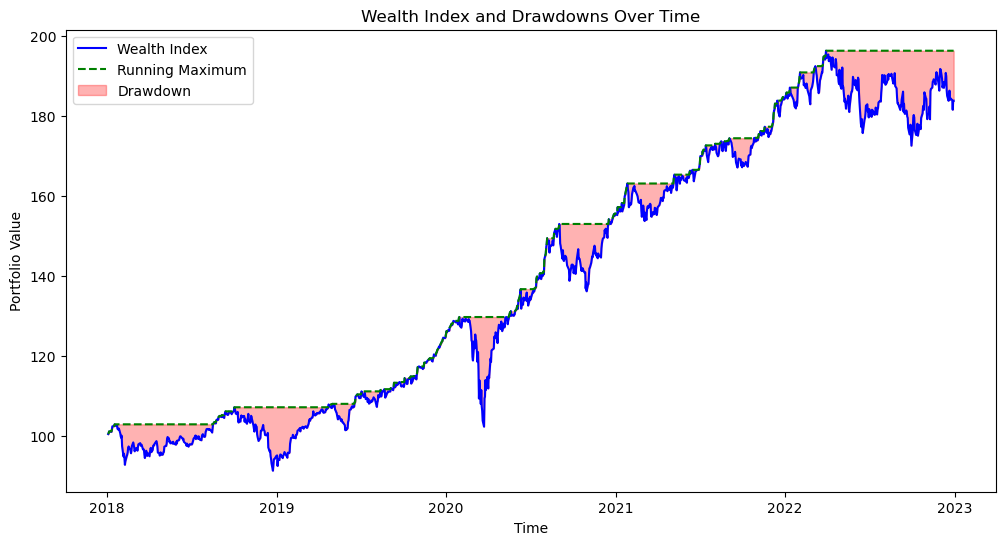

In [35]:
plt.figure(figsize=(12, 6))

plt.plot(wealth_index, label="Wealth Index", color="blue")
plt.plot(running_max, label="Running Maximum", linestyle="--", color="green")
plt.fill_between(drawdowns.index, wealth_index, running_max, color="red", alpha=0.3, label="Drawdown")


plt.title("Wealth Index and Drawdowns Over Time")
plt.xlabel("Time")
plt.ylabel("Portfolio Value")
plt.legend()
plt.show()

### 6. Stress Testing

#### COVID-19 Market Crash

In [38]:
stress_1_daily_rets = daily_returns.loc["2020-02-19":"2020-06-30"]
stress_1_cov = stress_1_daily_rets.cov()
stress_1_portfolio_rets = portfolio_rets.loc["2020-02-19":"2020-06-30"]
stress_1_portfolio_vol = f.portfolio_vol(portfolio_weights, stress_1_cov)

In [39]:
stress_1_var = f.var_historic(stress_1_daily_rets, level=5)
stress_1_var = f.var_gaussian(stress_1_daily_rets, level=5, modified=False)

stress_1_skewness = f.skewness(stress_1_portfolio_rets)
stress_1_kurtosis = f.kurtosis(stress_1_portfolio_rets)
stress_1_var = f.var_gaussian(stress_1_daily_rets, level=5, modified=True)

stress_1_cvar_historic = f.cvar_historic(stress_1_portfolio_rets, level=5)
stress_1_cvar_gaussian = f.cvar_gaussian(stress_1_portfolio_rets, level=5, modified=False)
stress_1_cvar_cornish_fisher = f.cvar_gaussian(stress_1_portfolio_rets, level=5, modified=True)

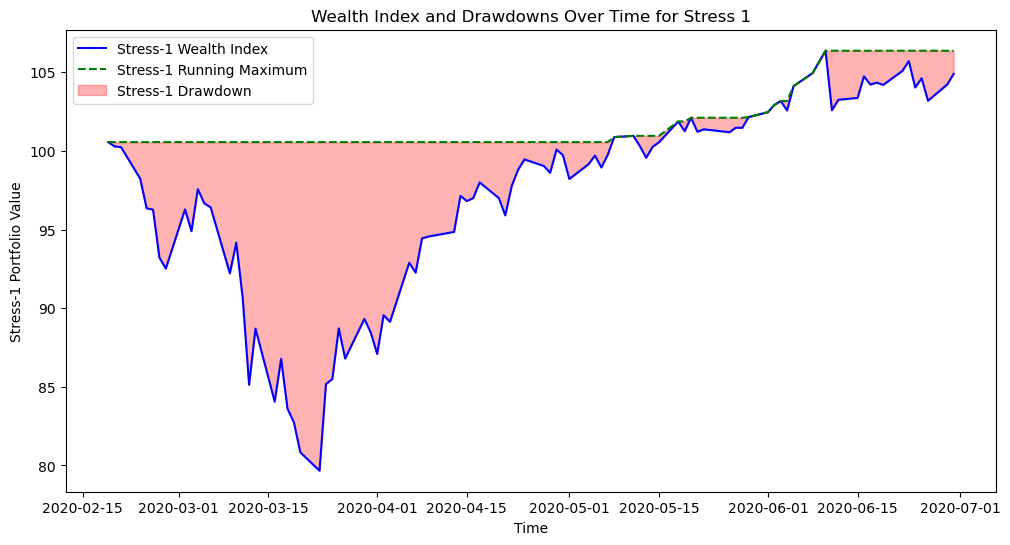

In [40]:
stress_1_drawdowns = f.drawdown(stress_1_portfolio_rets, start=100)
stress_1_max_drawdown = stress_1_drawdowns.min()

stress_1_wealth_index = f.compound_returns(stress_1_portfolio_rets, start=100)
stress_1_running_max = stress_1_wealth_index.cummax()

plt.figure(figsize=(12, 6))

plt.plot(stress_1_wealth_index, label="Stress-1 Wealth Index", color="blue")
plt.plot(stress_1_running_max, label="Stress-1 Running Maximum", linestyle="--", color="green")
plt.fill_between(stress_1_drawdowns.index, stress_1_wealth_index, stress_1_running_max, color="red", alpha=0.3, label="Stress-1 Drawdown")


plt.title("Wealth Index and Drawdowns Over Time for Stress 1")
plt.xlabel("Time")
plt.ylabel("Stress-1 Portfolio Value")
plt.legend()
plt.show()

### 7. Monte Carlo Simulations

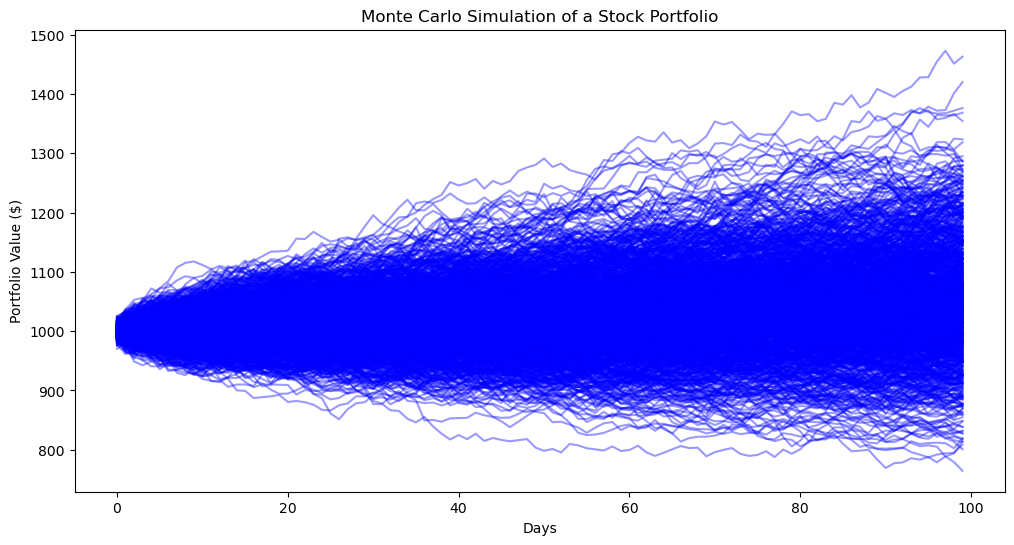

In [143]:
final_values = f.monte_carlo_simulation(daily_returns=daily_returns, 
                                      covariance_matrix=covariance_matrix, 
                                      portfolio_weights=portfolio_weights, 
                                      monte_carlo_sims=1000, 
                                      t=100,
                                      initial_portfolio=1000)

In [151]:
final_values_series = pd.Series(final_values)

In [155]:
var_mc = f.var_historic(final_values_series, level=5)

In [157]:
var_mc

-897.6364800402924

In [159]:
cvar_mc = f.cvar_historic(final_values_series, level=5)

In [161]:
cvar_mc

-860.5102036313639

In [175]:
max_drawdowns = []

for sim in range(portfolio_sims.shape[1]):  
    sim_path = pd.Series(portfolio_sims[:, sim])  # Convert to Series
    drawdown_df = f.drawdown(sim_path.pct_change().dropna(), start=initial_portfolio)  
    
    # Get the maximum drawdown
    max_dd = drawdown_df["Drawdown"].min()  # Minimum value in Drawdown column
    max_drawdowns.append(max_dd)

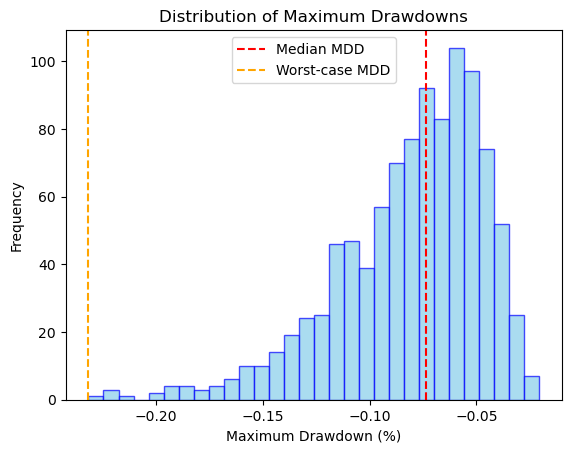

In [181]:
mean_dd_pct = np.mean(max_drawdowns)
median_dd_pct = np.median(max_drawdowns)
worst_dd_pct = np.min(max_drawdowns)

plt.hist(max_drawdowns, bins=30, color="skyblue", alpha=0.7, edgecolor="blue")
plt.axvline(median_dd_pct, color="red", linestyle="--", label="Median MDD")
plt.axvline(worst_dd_pct, color="orange", linestyle="--", label="Worst-case MDD")
plt.title("Distribution of Maximum Drawdowns")
plt.xlabel("Maximum Drawdown (%)")
plt.ylabel("Frequency")
plt.legend()
plt.show()

In [183]:
mean_dd_abs = mean_dd_pct * initial_portfolio
median_dd_abs = median_dd_pct * initial_portfolio
worst_dd_abs = worst_dd_pct * initial_portfolio

print(f"Mean Maximum Drawdown: {mean_dd_pct:.2%} (${mean_dd_abs:.2f})")
print(f"Median Maximum Drawdown: {median_dd_pct:.2%} (${median_dd_abs:.2f})")
print(f"Worst-case Maximum Drawdown: {worst_dd_pct:.2%} (${worst_dd_abs:.2f})")

Mean Maximum Drawdown: -8.09% ($-80.92)
Median Maximum Drawdown: -7.35% ($-73.49)
Worst-case Maximum Drawdown: -23.17% ($-231.68)


In [205]:
final_returns_series_daily = pd.DataFrame(portfolio_sims).pct_change().dropna()
periods_per_year=252

In [211]:
sharpe_ratios = f.sharpe_ratio(final_returns_series_daily, risk_free_rate=risk_free_rate, periods_per_year=periods_per_year)

In [213]:
average_sharpe_ratio = sharpe_ratios.mean()
worst_sharpe_ratio = sharpe_ratios.min()

In [219]:
print(f"Average Sharpe Ratio: {average_sharpe_ratio:.2f}")
print(f"Worst-case Sharpe Ratio: {worst_sharpe_ratio:.2f}")

Average Sharpe Ratio: 0.78
Worst-case Sharpe Ratio: -3.01
